# **Linear Regression**

Linear Regression is a model that attempts to explain the relationship between two variables by fitting a linear equation ($ y = mx + b $) to the data. One of the variables is considered a **dependent** variable in the sense that it can be obtained as a function of the other variable(s), which are **independent**. For a linear regression model to be effective, there has to be a linear relationship between the variables that are going to be used, and some common ways to see if our model is going to work or not is to visualize the data with a scatter plot, or obtain the correlation between our variables.

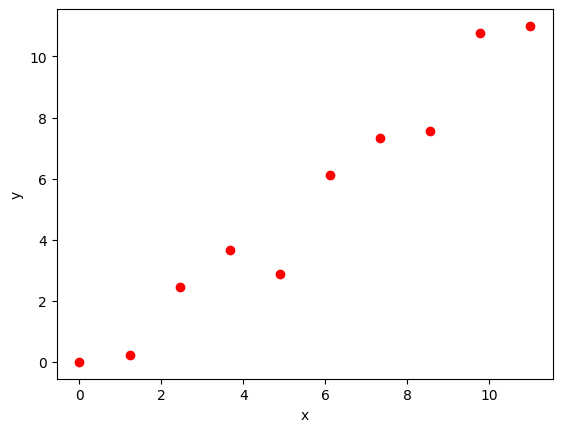

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(seed = 123)

x = np.linspace(start = 0, stop = 11, num = 10)
y = np.array([n + np.random.randint(-2, 2) for n in x]) 

plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can see that visually, the data follows a clear linear relationship, where as x increases, y does too. We can also confirm this relationship by obtaining the correlation between the variables.

In [2]:
corr = np.corrcoef(x, y)
print(f'The correlation between x and y is: {corr[0, 1]:.4f}')

The correlation between x and y is: 0.9797


The linear regression algorithm starts off by creating a linear model that tries to describe our data, and then improving it by reducing the error between our data points and the fitted line. The first line that is fit to the data is a horizontal line with a slope and y-intercept of 0, giving the equation $ y = 0$

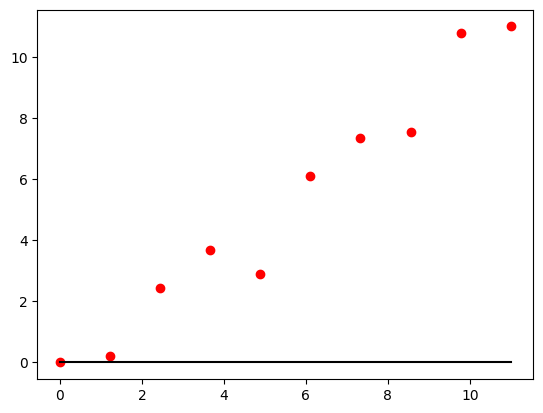

In [3]:
yi = np.zeros(x.shape)
plt.plot(x, y, 'ro')
plt.plot(x, yi, 'k')
plt.show()

This line doesn't do that well of a job describing the relationship between our data. A formal way to describe how _bad_ this fitted line is, is to obtain the error between the line and the actual data samples. There are many ways to represent error, the most common ones being: Sum of Squared Residuals (SSR), Mean Absolute Error (MAE), Mean Squared Error (MAE) and Root Mean Squared Error (RMSE). The equations describing these errors are: $$ SSR = \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2 $$ 
$$ MAE = \frac{1}{n}\sum \limits _{i = 0} ^{n} |y_i - Y_i| $$
$$ MSE = \frac{1}{n} \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2 $$
$$ RMSE = \sqrt{\frac{1}{n} \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2} $$ 
For obtaining the error when modelling data using linear regression, the preffered method is SSR. The SSR function and the calculation for our dataset is shown below.

In [4]:
def SSR(y1, y2):
    if(y1.shape == y2.shape):
        return np.sum((y1 - y2)**2)
    else:
        print('Array shape mismatch')
        return
    
print(f'SSR for y = 0: {SSR(y, yi):.2f}')

SSR for y = 0: 413.19


The sum of squared residuals is quite large. Let's see what happens if we increase the slope of our data a little bit. The linear equation of our model is now $y = 0.4x$

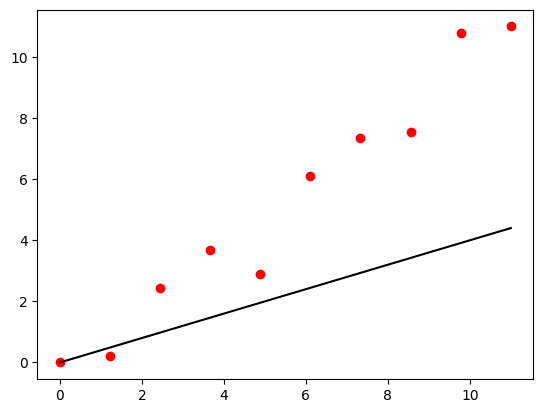

In [5]:
yi = x * 0.4
plt.plot(x, y, 'ro')
plt.plot(x, yi, 'k')
plt.show()

Visually, we can see that the line fits our data a little bit better than the initial fit. Let's back these observations by calculating the sum of squared residuals for this fit.

In [6]:
print(f'SSR for y = 0.4x: {SSR(y, yi):.2f}')

SSR for y = 0.4x: 148.53


The sum of the squared residuals is almost 3 times as small now. We can keep increasing the slope and keep comparing the sum of squared residuals and we should keep getting better and better results, but what happens if the slope is too high? Let's do a test when $ y = 2x$

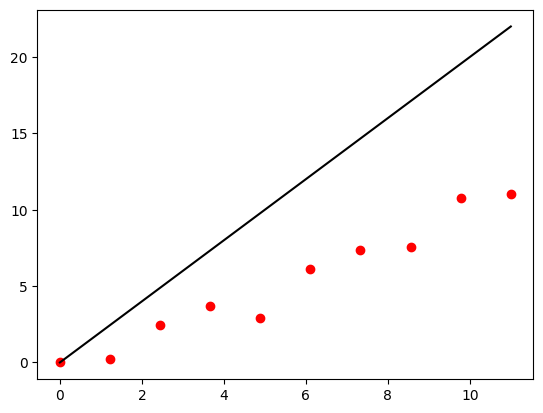

SSR for y = 0.4x: 452.30


In [7]:
yi = x * 2
plt.plot(x, y, 'ro')
plt.plot(x, yi, 'k')
plt.show()
print(f'SSR for y = 0.4x: {SSR(y, yi):.2f}')

Now the SSR for our fitted line is even worse than what we started with. This behavior suggests that there should be a sweet spot in the slope value between 0.4 and 2, where the SSR is the least it can be. We can define our sum of squared residuals as a function of our slope $m$ and see how it behaves as the slope changes. In this example, we are only going to optimize the slope $m$, so we will consider a y-intercept $b$ of $0$. Later on, we will explore how we can optimize both parameters at the same time.

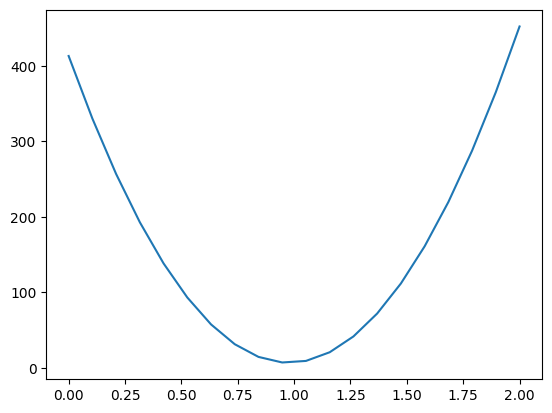

In [8]:
m = np.linspace(0, 2, 20)
ss = []
for mi in m:
    yi = x * mi
    ssr = SSR(y, yi)
    ss.append(ssr)

plt.plot(m, ss)
plt.show()

We can see that there is a point when $ m \approx 0.95 $ where the SSR is minimum. This is the slope that gives us the best fitted line for our data. There are several approaches to finding the exact value of the slope, most of them relying on the concept of derivatives and how they approach $0$ near a minimum (or maximum) of our function. We will use least squares to find the optimal value, which involves finding where the derivative is equal to $0$, but there are other methods, like gradient descent. When differentiating the SSR function with respect to the slope value, we get 
$$ SSR = \sum \limits _{i = 0} ^{n} (y_i - Y_i)^2 $$ 
$$ \frac{d}{dm}SSR(m) = -2\sum \limits _{i = 0} ^{n} x_i(y_i - (mx_i + b)) $$ 
When equating this expression to $0$, we get the following reduction
$$ -2\sum \limits _{i = 0} ^{n} x_i(y_i - (mx_i + b)) = 0$$ 
$$ \sum \limits _{i = 0} ^{n} (y_i x_i -  mx_i^2 + b x_i) = 0$$ 
$$ m\sum \limits _{i = 0} ^{n} x_i^2 = \sum \limits _{i = 0} ^{n} y_i x_i - b\sum \limits _{i = 0} ^{n} x_i$$ 
$$ m = \frac {\sum \limits _{i = 0} ^{n} y_i x_i - b\sum \limits _{i = 0} ^{n} x_i}{\sum \limits _{i = 0} ^{n} x_i^2 }$$ 
Since in this example we are only optimizing the slope ($m$) and we set the y-intercept ($b$) to 0, we can perform the summation and get our value for the slope

In [9]:
sumx = np.sum(x)
sumyx = np.sum(y*x)
sumx2 = np.sum(x**2)
n = x.shape[0]
m = (sumyx)/sumx2
print(f'Optimal value for the slope: {m:.4f}')

Optimal value for the slope: 0.9770


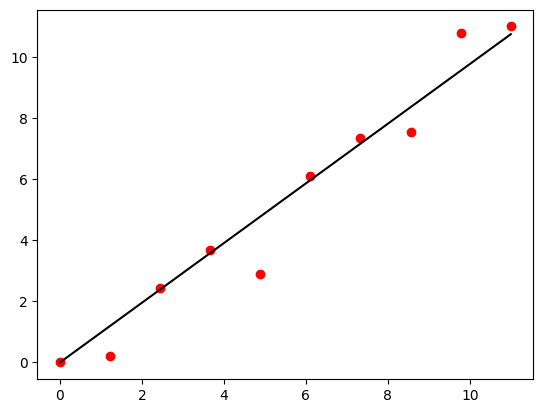

SSR for y = 0.9770x: 6.78


In [10]:
yi = x * 0.9770
plt.plot(x, y, 'ro')
plt.plot(x, yi, 'k')
plt.show()
print(f'SSR for y = 0.9770x: {SSR(y, yi):.2f}')

Now, we have fit the line that gives the lowest possible SSR, meaning that we have the best possible fit and we can move over to making predictions by plugging in x values into our line equation or getting information from our fitted line. As of now, we have pretty much ignored another crucial parameter on our regression line, the y-intercept, or $b$ term. We can solve for both variables at the same time by finding the local minimum of a multivariate function. Let's see this with another dataset.

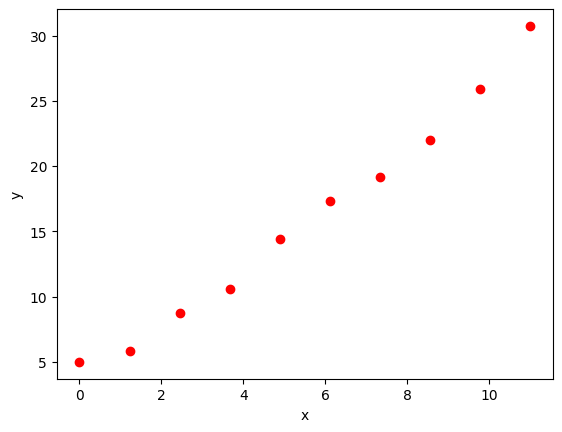

In [11]:
x = np.linspace(start = 0, stop = 11, num = 10)
y = np.array([2.34*n + np.random.randint(-3, 3) + 5 for n in x]) 

plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now, we fit an initial line with just a y-intercept of $\bar{x}$. We can see that the SSR is quite large.

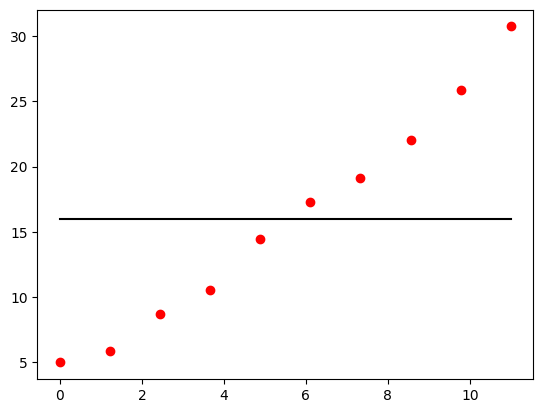

SSR for y = x̄: 671.42


In [12]:
yi = np.full(x.shape, y.mean())
plt.plot(x, y, 'ro')
plt.plot(x, yi, 'k')
plt.show()
print(f'SSR for y = x̄: {SSR(y, yi):.2f}')

When plotting the SSR as a colormesh, we can see that the function is convex and there is a point where the SSR is minimum. We will use least squares to obtain the optimal values for the model parameters.

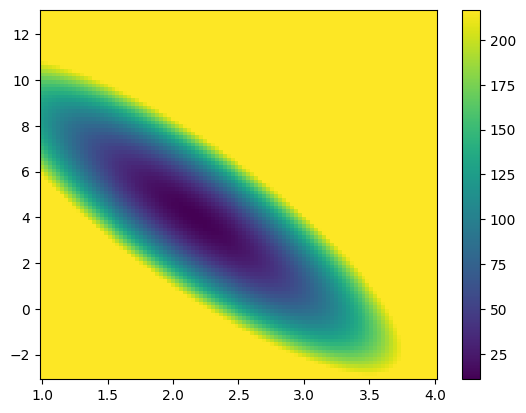

In [13]:
m = np.linspace(1, 4, 100)
b = np.linspace(-3, 13, 100)

ss = np.empty((m.shape[0], b.shape[0]))
for i, mi in enumerate(m):
    for j, bi in enumerate(b):
        yi = x * mi + bi
        ssr = SSR(y, yi)
        ss[i, j] = ssr

mg, bg = np.meshgrid(m, b)
minval = np.min(ss)
plt.pcolormesh(mg, bg, ss, vmin = minval, vmax = minval*20)
plt.colorbar()
plt.show()

When deriving the original SSR equation with respect to both $m$ and $b$, and equating each one to zero to find the mininum, we get the following two equations:
$$ m\sum \limits _{i = 0} ^{n} x_i^2 + b\sum \limits _{i = 0} ^{n} x_i = \sum \limits _{i = 0} ^{n} x_i y_i$$ 
$$ m\sum \limits _{i = 0} ^{n} x_i + bn = \sum \limits _{i = 0} ^{n} y_i$$ 
With this, we can substitute the summations with the values obtained from our data to get a system of equations that we can solve to get the optimal parameters. In the case of our example:

In [14]:
sumx = np.sum(x)
sumy = np.sum(y)
sumyx = np.sum(y*x)
sumx2 = np.sum(x**2)
n = x.shape[0]

print(f'Sum of x: {sumx:.2f}')
print(f'Sum of y: {sumy:.2f}')
print(f'Sum of xy: {sumyx:.2f}')
print(f'Sum of x²: {sumx2:.2f}')
print(f'Number of samples: {n:.2f}')

Sum of x: 55.00
Sum of y: 159.70
Sum of xy: 1163.68
Sum of x²: 425.74
Number of samples: 10.00


These values give the following system of equations.
$$ 425.74m + 55b = 1163.68 $$
$$ 55m + 10b = 159.70 $$

In [15]:
cf = np.array([[sumx2, sumx],[sumx, n]])
o = np.array([sumyx, sumy])
best_m, best_b = np.linalg.solve(cf, o)
print(f'Best slope: {best_m:.2f}, best y-intercept: {best_b:.2f}')

Best slope: 2.32, best y-intercept: 3.24


Now we have found the best values for both parameters at the same time! The resulting line would be $y = 2.23x + 5.73$. We can plot the final regression line with the original data samples and confirm that the values obtained are indeed a great fit.

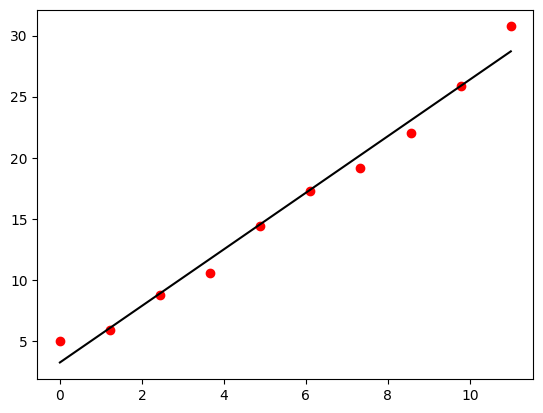

SSR for y = 2.32x + 3.24: 10.82


In [16]:
yi = best_m * x + best_b
plt.plot(x, y, 'ro')
plt.plot(x, yi, 'k')
plt.show()
print(f'SSR for y = 2.32x + 3.24: {SSR(y, yi):.2f}')

We can use scikit-learn's LinearRegression model to fit our data to a line using optimized algorithms. We can confirm that both methods give the best result since the parameters in both models are the same.

In [17]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
lin = LinearRegression()
lin.fit(x, y)

print(f'scikit-learn\'s estimation for the best line: {lin.coef_[0]:.2f}x + {lin.intercept_:.2f}')

scikit-learn's estimation for the best line: 2.32x + 3.24


## **Multiple regression**

As of now, linear regression is a very simple model that does a good job describing a linear relationship between one independent and one dependent variable. In the real world, we would use this model to predict real values like prices, but in reality, a real continious variable is hardly described by a single feature. Multiple features or independent variables can be considered in order to more accurately describe a dependent variable. This is called multiple regression and it tries to fit a hyperplane of dimension n-1 that describes an n-dimensional dataset. What does this mean? If we have 2 variables that we want to use to predict a third one, we could plot this in a 3D graph and multiple regression would try to fit a plane to the data, instead of a line. This holds true for higher dimensions (independent variables in our data) even if the visualization is impossible to conceptualize.

In [40]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', usecols = range(1, 5))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The following dataset contains information about how effective certain advertisement methods are on the actual sales. We are going to try to predict sales based on the advertisement data. First, we look at the relationship between each feature (independent variable) and the target (dependent variable).

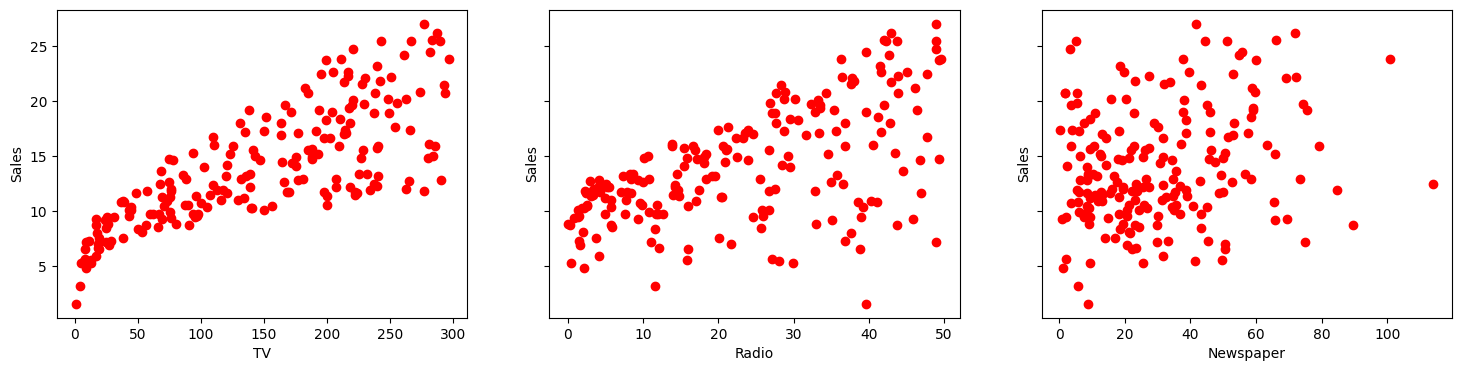

Correlation values of features with the target:
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [19]:
fig, ax = plt.subplots(1, 3, sharey = True)
fig.set_size_inches(18, 4)
ax[0].plot(df['TV'], df['Sales'], 'ro')
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')
ax[1].plot(df['Radio'], df['Sales'], 'ro')
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')
ax[2].plot(df['Newspaper'], df['Sales'], 'ro')
ax[2].set_xlabel('Newspaper')
ax[2].set_ylabel('Sales')
plt.show()

print(f'Correlation values of features with the target:\n{df.corr().iloc[:3,3]}')

We can see that TV is highly correlated with sales, while Radio is somewhat correlated and Newspaper is not very correlated. The correlation values confirm this behavior. Since there are only two variables that are somewhat linearly correlated with our data, we will consider only these two variables and drop the third one, since a linear relationship between our target and the last variable wouldn't be very precise. We will curate our dataset and visualize it on a 3D graph.

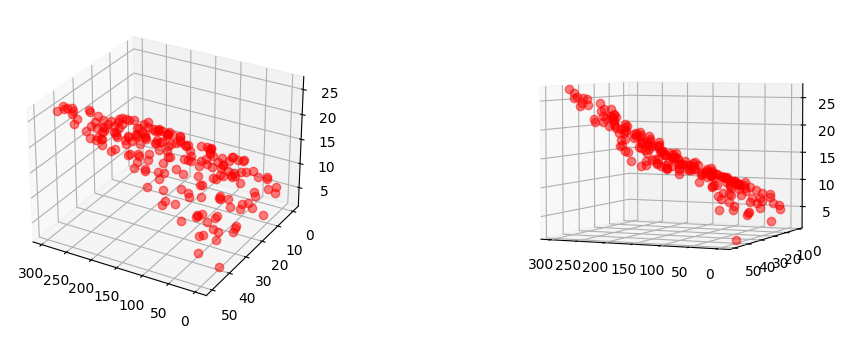

In [20]:
X = df[['TV', 'Radio']].values
y = df['Sales'].values

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
axes = [ax1, ax2]

for ax in axes:
    ax.plot(X[:, 0], X[:, 1], y, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)

We can clearly see that the plot resembles a plane, meaning that multiple regression would likely give a very good fit to our data. We will run it through scikit-learn's LinearRegression model in order to see the optimal fit.

In [21]:
model = LinearRegression()
model.fit(X, y)

np.set_printoptions(precision = 3)
print(f'Slope parameter matrix for our model:\n{model.coef_} with intercept {model.intercept_:.3f}' )

Slope parameter matrix for our model:
[0.046 0.188] with intercept 2.921


The LinearRegression model uses least squares to estimate the best parameters, and further on we will analyze the analitical solution to multiple least squares, for now, we can see that the algorithm reached an optimal plane and we can plot it on a 3D graph to see how well it fits the data.

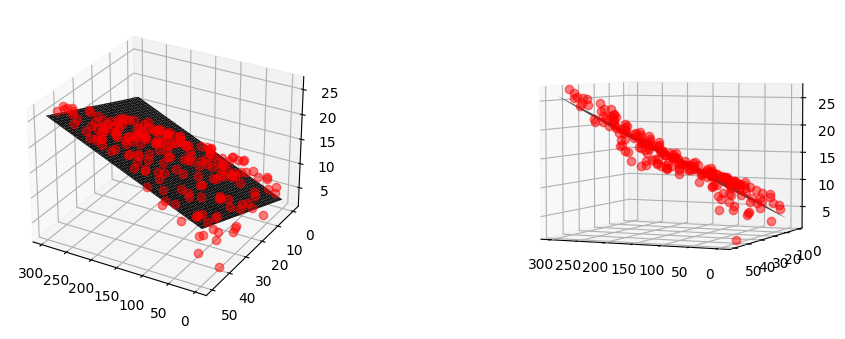

In [22]:
from mpl_toolkits.mplot3d import Axes3D
z1 = y
x1 = X[:, 0]
y1 = X[:, 1]

x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = np.linspace(y1.min(), y1.max(), 100)

x2, y2 = np.meshgrid(x2, y2)
z2 = model.coef_[0] * x2 + model.coef_[1] * y2 + model.intercept_

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
axes = [ax1, ax2]

for ax in axes:
    ax.plot(x1, y1, z1, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot_surface(x2, y2, z2, color='k')
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)


As we can see, the model does a very good job fitting a plane to our data. If we had more variables we could not visualize the model, but the principles would still hold true for higher dimensions.

In [23]:
yi = np.matmul(X, model.coef_) + model.intercept_
print(f'SSR for the fitted plane: {SSR(y, yi)}')

SSR for the fitted plane: 556.9139800676182


Since this is a more complex dataset and the data can be dispersed through 3 different axes now, the optimal SSR is much higher than in the simple linear regression model. This is not an issue and the model still represents our data quite well.

## **Assumptions of linear regression**
Simple and multiple linear regression model have some general facts that are taken as a given for the model to give an accurate result. These facts are known as the assumptions of linear regression and there are four main assumptions listed by statisticians. Let's explore these assumptions one by one.

### **Linear relationship**
For a linear model to correctly describe the relationship of two variables, it is obvious that they need to actually have a linear relationship. Non-linear relationships are common when working with complex datasets and they cannot be modeled by linear regression.

### **Homoscedasticity**
This property allows the model to assume that the variance of the errors is constant across the domain of the variables. This means that no matter where we stand in the number line of the independent variable, the error term will be roughly the same. Heteroscedasticity would mean that our errors drift in variance depending on the value of the independent variable and thus, cannot be correctly modeled using linear regression.

### **Normality**
Linear regression assumes the error to be normally distributed, meaning that the average, or mean of all the errors should be close to 0, and that our error can overshoot or undershoot the linear prediction in equal probability. 

### **No multicolinearity**
An important aspect to consider when analyzing multiple regression models is a problem that arises called multicolinearity. When we think about the individual relationships each independent variable can have with the dependent variable, we consider them separate, but there could be a case where two independent variables are strongly correlated with each other. This is a problem, since the individual relationship one of the variables has to the target cannot be completely reliable, since a change in it can also affect the correlated independent variable and with that, the target in a way that it is not intended to.

An example of this could be two features $x_1$, $x_2$ and a target variable $y$. Assume that $x_1$ is positively correlated to $y$ and $x_2$ is negatively correlated to $y$. When we increase $x_1$, we would expect $y$ to increase, and when increasing $x_2$, $y$ should decrease. Now, if multicolinearity exists, $x_1$ and $x_2$ would be correlated, in this example, assume they are strongly positively correlated. Now, when we increase $x_1$, $y$ should increase, but the increase in $x_1$ causes an increase in $x_2$ because of multicolinearity, which in response, decreases $y$, altering our analysis.

We need to note that although multicolinearity can be present in a linear regression model, it does not mean that the complete model's performance in predicting a variable is bad or wrong, it just means that the individual regression coefficients for the independent variables might be unreliable to use. Let's analyze the multicolinearity in our multiple regression model.


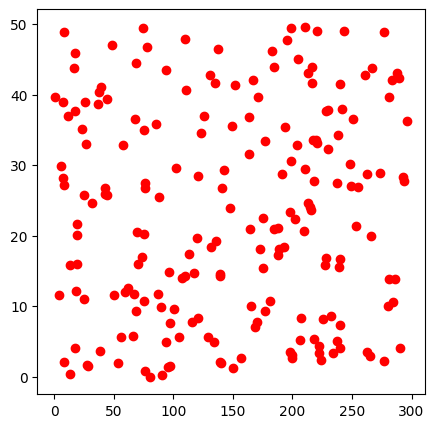

Correlation value between independent variables: 0.0548


In [24]:
plt.figure(figsize = (5,5))
plt.plot(X[:,0], X[:,1], 'ro')
plt.show()

print(f'Correlation value between independent variables: {np.corrcoef(X.T)[0, 1]:.4f}')

Visually, the relationship is disperse, and this can be confirmed by the low correlation value between the variables, so we don't need to worry about multicolinearity in this dataset.

## **Vectorization**

One way to simplify least squares calculations is to vectorize our equations. This has two main advantages, it gives more compact equations and it makes the code faster by using optimized vector libraries. When vectorizing our linear regression equation, we get the following:
$$ \hat{y}_i(x^{(i)}) = \sum\limits _{j = 0} ^{d} \beta_j x^{(i)}_{j}$$

where $y_i$ is the predicted dependent variable of sample $i$, $\beta_j$ is the slope parameter of the independent feature $j$ and $x^{(i)}_{j}$ is the value of the input variable $j$ in sample $i$.

Now, let:

$$ \beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_j\end{bmatrix}\textrm{,}\ \  \hat{y} = \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_n \end{bmatrix} \textrm{and}\ \  X = \begin{bmatrix} 1 & x_1^{(1)} & \ldots & x_j ^{(1)} \\ 1 & x_1^{(2)} & \ldots & x_j ^{(2)} \\ \vdots & \vdots & \ddots & \vdots\\ 1 & x_1^{(i)} & \ldots & x_j ^{(i)} \\ \vdots & \vdots & \ddots & \vdots\\ 1 & x_1^{(n)} & \ldots & x_j ^{(n)} \end{bmatrix} $$

<br><br>$\beta$ is the parameter vector where $\beta_0$ is the y-intercept and $\beta_j, j > 0$ is the slope or weight parameter of the $j^{th}$ independent variable or feature. $\hat{y}$ is the vector of predicted values of the dependent variable, where each column represents the value at sample $i$ for $n$ samples. $X$ is the matrix of independent variables or design matrix that contains the input values for a sample $i$ for every independent variable $j$. The design matrix often contains a first row full of 1's so that the first term will correspond to the y-intercept when multiplied by $\beta_0$. The sizes of the parameter vector, predicted dependent variable vector and design matrix are $(d+1)\times1$, $n\times1$, and $n\times(d+1)$ respectively, where $n$ is the number of samples and $d$ is the number of independent variables. Using these matrices, the model can be written in vectorized form such that:
$$\hat{y} = X\beta$$

Now, considering the sum of squared residuals function and the column vector $y$ of observed dependent variable values taken from our dataset such that: $$ y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$ we would have:
$$ SSR(\hat{y}, y) = \sum \limits _{i = 0} ^{n} (\hat{y}_i - y_i)^2 $$ 
$$ SSR(\beta) =(X \beta - y)^2 $$ 
$$ SSR(\beta) =(X \beta - y)^T (X \beta - y) $$ 

<br><br>Expanding the terms by considering that $(AB)^T = B^T A^T$ and $(A + B)^T = A^T + B^T$:
$$SSR(\beta) =(\beta^T X^T - y^T)(X \beta - y) $$
$$SSR(\beta) =\beta^T X^T X\beta - y^T X\beta - \beta^T X^Ty + y^Ty  $$
$$SSR(\beta) = \beta^T X^T X\beta - 2\beta^T X^Ty + y^Ty  $$

<br><br>Now, we derive the vectorized SSR with respect to $\beta$ considering that $\frac{d}{dA}(A^T A) = 2A$ and $\frac{d}{dA}(A^T) = 1$:<br><br>
$$ \frac{d}{d\beta}(SSR(\beta)) =\frac{d}{d\beta}(\beta^T X^T X\beta - 2\beta^T X^Ty + y^Ty)$$ 
$$ \frac{d}{d\beta}(SSR(\beta)) =\frac{d}{d\beta}(\beta^T X^T X\beta) -2\frac{d}{d\beta}(\beta^T X^Ty) + \frac{d}{d\beta}(y^Ty)$$ 
$$ \frac{d}{d\beta}(SSR(\beta)) =X^T X\frac{d}{d\beta}(\beta^T\beta) -2X^Ty\frac{d}{d\beta}(\beta^T)$$ 
$$ \frac{d}{d\beta}(SSR(\beta)) =X^T X 2\beta -2X^Ty$$ 
$$ \frac{d}{d\beta}(SSR(\beta)) = 2(X^T X\beta - X^Ty)$$ 

<br><br>Equating the derivative to $0$ in order to obtained the least squares value for $\beta$ gives us:
$$ 2(X^T X\beta - X^Ty) = 0 $$
$$ X^T X\beta - X^Ty = 0 $$
$$ X^T X\beta = X^Ty $$
$$\beta = (X^T X)^{-1} X^Ty $$

<br><br>This is the vectorized form of the least squares formula that solves for the optimal parameter vector $\beta$ as a function of the design matrix $X$ and the independent variable values $y$, both of which are obtained from our base data set.

This formula can be easily computed using NumPy and this is close to what the LinearRegression algorithm in scikit-learn does. The time complexity of this algorithm is roughly $O(n^3)$, and it is the preffered method over other methods like gradient descent for simple linear regression because it is not iterative and we don't need to specify any hyperparameters. The implementation of the formula is shown below and we can notice that the results are exactly the same as the ones obtained with scikit-learn.

In [25]:
ones = np.ones((X.shape[0], 1))
dm = np.hstack((ones, X))

beta = np.dot((np.dot(np.linalg.inv(np.dot(dm.T, dm)), dm.T)), y)
print(f'Parameter vector obtained with vectorized equations: {beta}')

Parameter vector obtained with vectorized equations: [2.921 0.046 0.188]


We can see that the parameters obtained with the vectorized equation gives us the same parameters obtained through the scikit-learn LinearRegression model, where the model.intercept_ is the first element in our parameter vector and the remaining elements conform the model.coef_ vector.

Additionaly, $(A^TA)^{-1} A^T $ is known as the pseudo-inverse of A, and it is denoted as $A^+$. This means that our entire least squares equation can be expressed as $\beta = X^+ y$, and simplified in code by using NumPy's pseudo-inverse function (np.lingalg.pinv). In the below code, we can see that the resulting matrix is the exact same as the one above.

In [26]:
beta = np.dot(np.linalg.pinv(dm), y)
print(f'Parameter vector using pseudo-inverse: {beta}')

Parameter vector using pseudo-inverse: [2.921 0.046 0.188]


A problem that can arise when using the vectorized form is the case where $X^TX$ is a singular matrix (not invertible). This can happen when we have more independent variables (features) than samples, or when there is multicolinearity present in our data set. This is another important reason why multicolinearity hinders our model. A solution to the singularity of the matrix is to use the pseudo-inverse, which derives from SVD on our matrix. Calculation using the pseudo-inverse is more robust and it is exactly what scikit-learn uses to solve least squares.

## **Coefficient of determination $(R^2)$**

An interesting metric that we can calculate is how much of the variance in the data can be explained by our independent variables. This is known as the coefficient of determination, or more commonly known as $R^2$. $R^2$ is obtained by analyzing the variances around the mean of the data, and around the fitted regression line, and seeing how the variance decreases when we fit a line. One of the many benefits of quantifying our model performance with $R^2$ is that it is very intuitive, and it exhibits a linear behavior in the sense that, a value of 0.8 means that our regression is twice as good as one with a value of 0.4. Intuitiveness can also come in the form that $R^2$ can be expressed as a percentage. Another interesting fact about $R^2$ is that it is the square of the Pearson correlation coefficient. Let's see how we can obtain $R^2$ from our datasets.

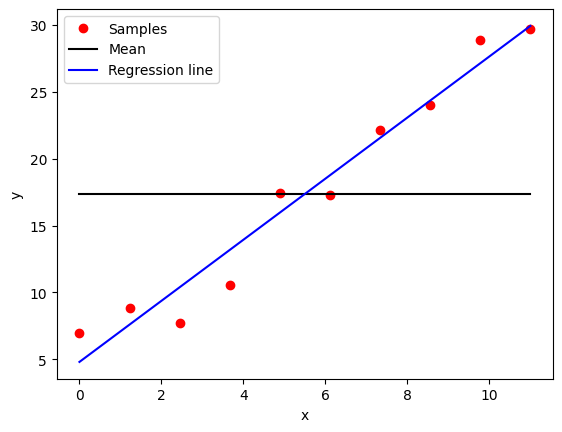

Sum of squares around the mean: 671.8570
Sum of squares around the fitted line: 28.1333


In [27]:
x = np.linspace(start = 0, stop = 11, num = 10)
y = np.array([2.34*n + np.random.randint(-3, 3) + 5 for n in x]) 
y1 = np.full(x.shape, y.mean())
des = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1,1)))
coef = np.dot(np.linalg.pinv(des), y)
y2 = np.matmul(des, coef)

plt.plot(x, y, 'ro', label = 'Samples')
plt.plot(x, y1, 'k', label = 'Mean')
plt.plot(x, y2, 'b', label = 'Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ssrm = SSR(y, y1)
ssrf = SSR(y, y2)
print(f'Sum of squares around the mean: {ssrm:.4f}\nSum of squares around the fitted line: {ssrf:.4f}')

We can see that the sum of squares around the fitted line is much lower than the sum of squares around the mean. $R^2$ is traditionally defined as: $$ R^2 = 1 - \frac{\sigma^2_{f}}{\sigma^2_{m}} $$ where $\sigma^2$ is the variance in the data, obtained as $\sigma^2 = \frac{SSR}{n}$ where SSR is the sum of squared residuals around a particular line (when only describing a dataset and not a regression line it would be the mean, this is what variance usually refers to) and $n$ is the number of observations. $\sigma^2_{f}$ is the statistical variance around the fit and $\sigma^2_{m}$ is the variance around the mean. Since both variances use the same number of observations, $R^2$ is defined as: $$ R^2 = 1 - \frac{SSR_{f}}{SSR_{m}} $$
Lets obtain $R^2$ for our fitted line.

In [28]:
r2 = 1 - ssrf/ssrm
print(f'Coefficient of determination (R²) for our regression line: {r2:.4f} or {r2*100:.2f}%')

Coefficient of determination (R²) for our regression line: 0.9581 or 95.81%


The value for $R^2$ is really close to 1, or 100%. What does this mean? That 95.81% of the variation in the independent variable is explained by taking our dependent variable into account. A lower value of $R^2$ would mean that not as much of the variation is explained with our features, or that our fitted line is not as good in explaining our dependent variable. 

$R^2$ for multiple regression gives the same insight as in simple linear regression, but an adjust needs to be made to compensate for the extra parameters. The adjusted $R^2$ also compensates for data with low sample count. $R^2$ The equation for adjusted $R^2$ is: 
$$ R^2 = 1- \frac{(1-R^2)(n-1)}{n-p-1} $$
where $R^2$ is the unadjusted value, $n$ is the number of samples and $p$ is the number of independent variables. Let's see this in action using our adveritising dataset.

In [33]:
y1 = np.full(X.shape[0], z1.mean())
ssrm = SSR(y1, z1)
ssrf = 556.914
n = y1.shape[0]
p = 2
r2 = 1 - ssrf/ssrm
adjr2 = 1 - ((1-r2)*(n-1))/(n-p-1)
print(f'R² for our multiple regression plane: {adjr2:.4f} or {adjr2*100:.2f}%')
print(f'Sum of squares around the mean: {ssrm:.4f}\nSum of squares around the fitted plane: {ssrf:.4f}')

R² for our multiple regression plane: 0.8962 or 89.62%
Sum of squares around the mean: 5417.1488
Sum of squares around the fitted plane: 556.9140


This means that our regression model explains 89.62% of the variation in the target variable. Let's compare this to a model that predicts sales using only the TV independent variable.

In [35]:
x = X[:, 0]
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), z1)
y = x * lr.coef_[0] + lr.intercept_
ssrf = SSR(y, z1)
ssrm = SSR(y1, z1)
r2 = 1 - ssrf/ssrm
print(f'R² for a simple regression model: {r2:.4f} or {r2*100:.2f}%')
print(f'Sum of squares around the mean: {ssrm:.4f}\nSum of squares around the fitted line: {ssrf:.4f}')

R² for a simple regression model: 0.6119 or 61.19%
Sum of squares around the mean: 5417.1488
Sum of squares around the fitted line: 2102.5306


When we only consider a single independent variable, only 61.19% of our variance in the dependent variable is explained by it, compared to the 89.62% that our multiple regression explains. This is a significant improvement and it tells us how useful it is to add this feature to our model. It is important to note that least squares will automatically set the weight of any useless variable to 0, meaning that adding variables to our model will never make the $R^2$ value worse, it will only increase or stay the same, and that is another reason why it is important to adjust $R^2$.

### **p-value for $R^2$**

One important thing we need to consider is how statistically significant our $R^2$ value is. Suppose we only have 2 samples in our dataset and we obtain a regression line. The $R^2$ value would be 1 or 100%, since you can always draw a line that passes through those two points, but it would not be statistically significant since we only have 2 samples and cannot generalize it. To obtain the p-value for $R^2$ we take into account $F$, which is defined as: $$ F = \frac {(SSR_m - SSR_f)/(p_f - p_m) }{SSR_f / (n - p_f)} $$ where $SSR_m$ and $SSR_f$ are the sum of squared residuals around the mean and the fitted line respectively, $p_f$ are the number of parameters in the fitted line, $p_m$ are the number of parameters in the mean and $n$ is the number of samples.
$(p_f - p_m)$ and $(n-p_f)$ are known as the degrees of freedom in the numerator and denominator. 

In order to obtain p-values, we need to calculate the distribution of F for random values with the same degrees of freedom, and then obtain the p-value from the distribution by dividing the more extreme values than the F value for our particular regression over the total values. F-distributions are already characterized by their degrees of freedom and we don't need to calculate them by hand, we can just refer to their values at our specific point and calculate the p-value. Let's obtain the p-value for $R^2$ that we got on the simple regression.

In [37]:
import scipy.stats as stats

pf = 2
pm = 1
n = 10
dfn = pf - pm
dfd = n - pf
F = ((574.7370 - 17.2970)/(dfn))/((17.2970)/(dfd))
p = 1 - stats.f.cdf(F, dfn, dfd)

print(f'F value for our fitted line: {F:.2f}\np-value for R²: {p:.7f}')

F value for our fitted line: 257.82
p-value for R²: 0.0000002


As a general guideline, if the p-value is less than 0.05, we can say that the value is statistically significant. Since our p-value was much lower than 0.05, our $R^2$ is statistically significant and we can trust that it is not obtained by chance. p-values can also be important for comparing models. Above, we saw the comparison between a multiple and a simple regression line on our advertisement dataset, and we saw that the $R^2$ value had a significant increase when we considered the 2 variables, but how do we know this is not only by chance? We can calculate the p-value with the same equation for F that we saw above, substituting the values of the mean for the values of the univariate fit. The calculation for the p-value between the 2 models is shown below

In [45]:
p2 = 3
p1 = 2
n = 200
dfn = p2 - p1
dfd = n - p2
F = ((2102.530 - 556.914)/(dfn))/((556.914)/(dfd))
p = 1 - stats.f.cdf(F, dfn, dfd)

print(f'F value for our fitted line: {F:.2f}\np-value for R²: {p:.16f}')

F value for our fitted line: 546.74
p-value for R²: 0.0000000000000001


The p-value is way, way lower than our 0.05 threshold, so we know that the difference in $R^2$ values for both of our models is statistically significant and since the $R^2$ difference is high, and the p-value is low, we conclude that adding the second variable to our model is worth devoting time and resources to.